In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
# this written to run cv2
import sys
sys.path.append('E:\\myenv\\Lib\\site-packages')

In [3]:
X_train = np.loadtxt('E:\\features & labels HOG\\HOG_1000_features.csv', delimiter = ',')
Y_train = np.loadtxt('E:\\features & labels HOG\\HOG_1000_lables.csv', delimiter = ',')
X_test = np.loadtxt('E:\\features & labels HOG\\HOG_300_features.csv', delimiter = ',')
Y_test = np.loadtxt('E:\\features & labels HOG\\HOG_300_lables.csv', delimiter = ',')

In [4]:
import cv2
import numpy as np

X_train = np.loadtxt('E:\\features & labels FFT\\FFT_1000_features.csv', delimiter = ',')
Y_train = np.loadtxt('E:\\features & labels FFT\\FFT_1000_lables.csv', delimiter = ',')
X_test = np.loadtxt('E:\\features & labels FFT\\FFT_300_features.csv', delimiter = ',')
Y_test = np.loadtxt('E:\\features & labels FFT\\FFT_300_lables.csv', delimiter = ',')
# Resize the images to the desired size
X_train_resized = []
for img in X_train:
    img_resized = cv2.resize(img, (100, 100))
    X_train_resized.append(img_resized)
X_train_resized = np.array(X_train_resized)

X_test_resized = []
for img in X_test:
    img_resized = cv2.resize(img, (100, 100))
    X_test_resized.append(img_resized)
X_test_resized = np.array(X_test_resized)

# Stack the grayscale images to create 3-channel images
X_train = np.stack([X_train_resized]*3, axis=-1)
X_test = np.stack([X_test_resized]*3, axis=-1)

# Reshape the input data to match the required input shape for the model
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print(X_train.shape)

(1000, 100, 100, 3)


In [6]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (1000, 100, 100, 3)
Shape of Y_train:  (1000, 1)
Shape of X_test:  (300, 100, 100, 3)
Shape of Y_test:  (300, 1)


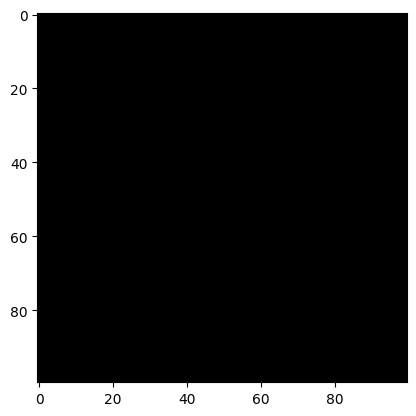

In [8]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model CNN

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
16/16 [==============================] - 13s 831ms/step - loss: 0.6934 - accuracy: 0.4840
Epoch 2/5
16/16 [==============================] - 13s 830ms/step - loss: 0.6932 - accuracy: 0.4900
Epoch 3/5
16/16 [==============================] - 13s 799ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/5
16/16 [==============================] - 13s 795ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 14s 848ms/step - loss: 0.6932 - accuracy: 0.4800


In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)

10/10 [==============================] - 1s 133ms/step - loss: 0.6931 - accuracy: 0.5000


In [13]:
# Predict on the test set
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Precision:", precision)
print("Recall (Sensitivity or True Positive Rate):", recall)
print("F1-score:", f1)

Accuracy: 0.5
Sensitivity (True Positive Rate or Recall): 0.0
Specificity (True Negative Rate): 1.0
Precision: 0.0
Recall (Sensitivity or True Positive Rate): 0.0
F1-score: 0.0


e:\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Making predictions


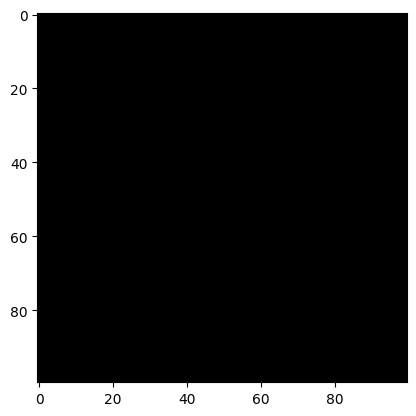

our model says that it is a : no tumor


In [13]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred==0):
    pred = 'no tumor'
else:
    pred = 'tumor'
    
print("our model says that it is a :", pred)

In [1]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

# Load an example grayscale MRI image
image = cv2.imread("brain_mri.jpg", cv2.IMREAD_GRAYSCALE)

# Apply LBP feature extraction
radius = 3
n_points = 8 * radius  # Number of points around the center
lbp_image = local_binary_pattern(image, n_points, radius, method='uniform')

# Flatten LBP feature representation
lbp_features = lbp_image.flatten().reshape(1, -1)

# Sample dataset (simulated)
X = np.random.rand(100, lbp_features.shape[1])  # Feature matrix
y = np.random.randint(0, 2, 100)  # Binary classification labels (Tumor/Non-Tumor)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Use TreeExplainer for tree-based models
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


ValueError: The parameter `image` must be a 2-dimensional array

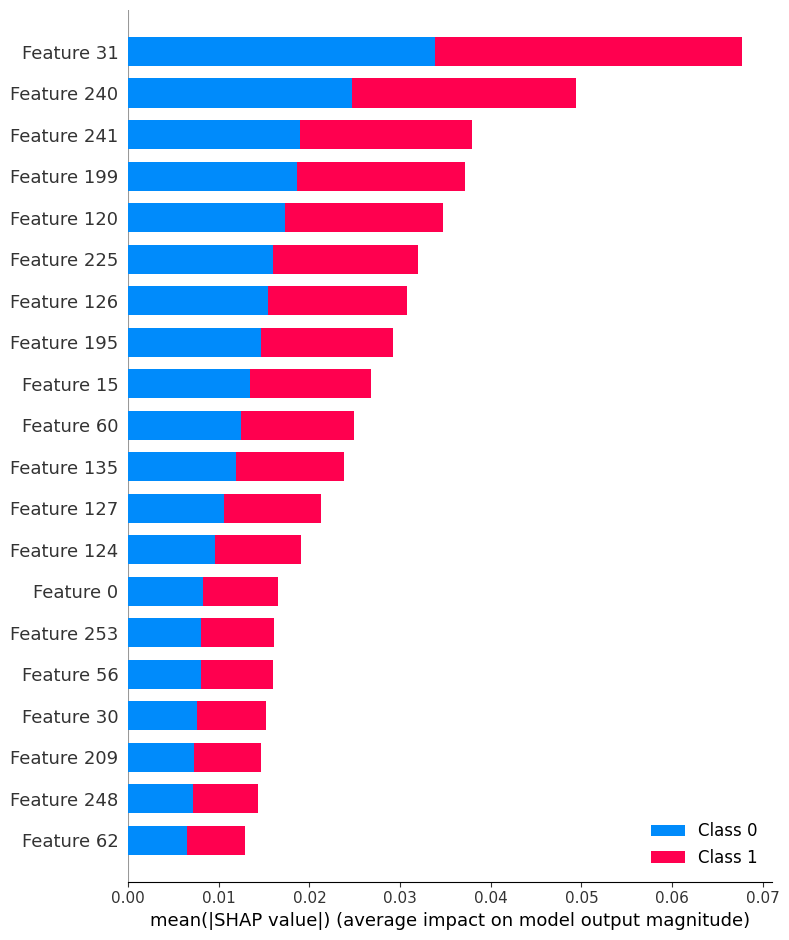

ValueError: The parameter `image` must be a 2-dimensional array

In [2]:
import cv2
import numpy as np
import shap
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset from CSV files
X_train = np.loadtxt('E:\\features & labels LBP\\LBP_1000_features.csv', delimiter=',')
Y_train = np.loadtxt('E:\\features & labels LBP\\LBP_1000_lables.csv', delimiter=',')
X_test = np.loadtxt('E:\\features & labels LBP\\LBP_300_features.csv', delimiter=',')
Y_test = np.loadtxt('E:\\features & labels LBP\\LBP_300_lables.csv', delimiter=',')

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Use SHAP for feature importance
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)

# Load an example grayscale MRI image for LBP visualization
image = cv2.imread("brain_mri.jpg", cv2.IMREAD_GRAYSCALE)

# Apply LBP feature extraction
radius = 3
n_points = 8 * radius  # Number of points around the center
lbp_image = local_binary_pattern(image, n_points, radius, method='uniform')

# Display the LBP image
plt.figure(figsize=(6, 6))
plt.imshow(lbp_image, cmap='gray')
plt.title("Local Binary Pattern Image")
plt.axis("off")
plt.show()

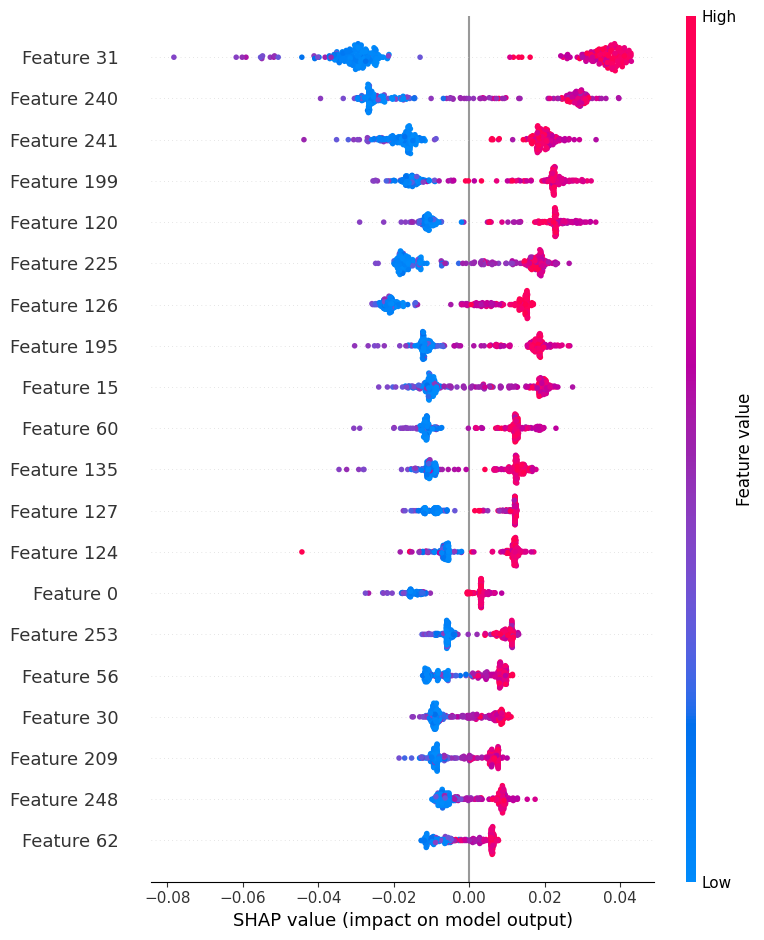

In [3]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset from CSV files
X_train = np.loadtxt('E:\\features & labels LBP\\LBP_1000_features.csv', delimiter=',')
Y_train = np.loadtxt('E:\\features & labels LBP\\LBP_1000_lables.csv', delimiter=',')
X_test = np.loadtxt('E:\\features & labels LBP\\LBP_300_features.csv', delimiter=',')
Y_test = np.loadtxt('E:\\features & labels LBP\\LBP_300_lables.csv', delimiter=',')

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Use SHAP for feature importance
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Prediction probabilities
pred_proba = model.predict_proba(X_test)

# SHAP summary plot
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values[1], X_test)  # Assuming binary classification (F and NOT F)
plt.show()


In [7]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset from CSV files
X_train = np.loadtxt('E:\\features & labels LBP\\LBP_1000_features.csv', delimiter=',')
Y_train = np.loadtxt('E:\\features & labels LBP\\LBP_1000_lables.csv', delimiter=',')
X_test = np.loadtxt('E:\\features & labels LBP\\LBP_300_features.csv', delimiter=',')
Y_test = np.loadtxt('E:\\features & labels LBP\\LBP_300_lables.csv', delimiter=',')

# Convert to DataFrame for better visualization
feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Get prediction probabilities
pred_proba = model.predict_proba(X_test)

# Select a test instance for visualization
instance_index = 0  # Change to see different test samples
single_instance = X_test.iloc[[instance_index]]

# Use SHAP for feature importance
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(single_instance)

# 1️⃣ **Plot Prediction Probabilities (Left Panel)**
probabilities = {f"Class {i}": pred_proba[instance_index][i] for i in range(len(model.classes_))}
prob_df = pd.DataFrame(probabilities.items(), columns=["Class", "Probability"])

plt.figure(figsize=(5, 3))
sns.barplot(x="Probability", y="Class", data=prob_df, palette="Blues_r")
plt.title("Prediction Probabilities")
plt.xlim(0, 1)
plt.show()

# 2️⃣ **SHAP Decision Plot (Middle Panel)**
shap.decision_plot(explainer.expected_value[1], shap_values[1], single_instance)
plt


ModuleNotFoundError: No module named 'seaborn'